In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the path for the dataframe
dataframe = 'C:/Users/Peter/py_projects/solar_stats/cdaw_cme_flare_ar_smart_database.p'

# Importing the dataframe 
df = pd.read_pickle(dataframe)

### Figure 6 from HELCATS paper (from Sammis paper too)

In [3]:
# Looking at columns we want
dfs = df[['srs_hale', "srs_area", 'flare_goes_class']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Reo-rganising the indicies
#dfs = dfs.reset_index()

dfs

srs_hale srs_area flare_goes_class
71        BETA     0880             C1.2
79        BETA     0580             C8.6
81        BETA     0450             C2.7
100      ALPHA     0010             B5.8
101      ALPHA     0010             C2.3
...        ...      ...              ...
29695     Beta     0240             B2.4
29696     Beta     0240             B2.4
29697     Beta     0160             C6.7
29698     Beta     0160             C6.7
29713    Alpha     0150             B1.4

[7385 rows x 3 columns]

In [4]:
# Splitting goes_class column into 2 so as to separate the class form the flux value

""" The pattern ([a-zA-Z]+)([^a-zA-Z]+) means match a group of letters: ([a-zA-Z]+) followed by a group 
    of non letters: ([^a-zA-Z]+) """

goes_split = dfs.flare_goes_class.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
goes_split.columns = ["goes_class", "goes_flux"]

# Adding these new columns into dfs 
dfs['goes_class'] = goes_split['goes_class']
dfs['goes_flux'] = goes_split['goes_flux']
dfs

srs_hale srs_area flare_goes_class goes_class goes_flux
71        BETA     0880             C1.2          C       1.2
79        BETA     0580             C8.6          C       8.6
81        BETA     0450             C2.7          C       2.7
100      ALPHA     0010             B5.8          B       5.8
101      ALPHA     0010             C2.3          C       2.3
...        ...      ...              ...        ...       ...
29695     Beta     0240             B2.4          B       2.4
29696     Beta     0240             B2.4          B       2.4
29697     Beta     0160             C6.7          C       6.7
29698     Beta     0160             C6.7          C       6.7
29713    Alpha     0150             B1.4          B       1.4

[7385 rows x 5 columns]

In [5]:
# The flux is a string ---> must convert to a float
# Replacing the incorrectly entered data --> 7,4 (shoud be 7.4)

# Checking the indicies in which this mistake occurs
print(dfs[dfs['goes_flux']=='7,4'].index.values)

# Going to replace each value of 7,4 with 7.4
dfs['goes_flux'] = dfs['goes_flux'].replace(['7,4'],'7.4')

[5433 5434]


In [6]:
# Converting string flux values to a float
dfs['goes_flux'] = dfs['goes_flux'].astype(float)

In [7]:
# Now multiplying the flux values by the relevant power for its GOES class
dfs.loc[dfs.goes_class == 'A', 'goes_flux'] *= 1e-8
dfs.loc[dfs.goes_class == 'B', 'goes_flux'] *= 1e-7
dfs.loc[dfs.goes_class == 'C', 'goes_flux'] *= 1e-6
dfs.loc[dfs.goes_class == 'M', 'goes_flux'] *= 1e-5
dfs.loc[dfs.goes_class == 'X', 'goes_flux'] *= 1e-4

In [8]:
dfs

srs_hale srs_area flare_goes_class goes_class     goes_flux
71        BETA     0880             C1.2          C  1.200000e-06
79        BETA     0580             C8.6          C  8.600000e-06
81        BETA     0450             C2.7          C  2.700000e-06
100      ALPHA     0010             B5.8          B  5.800000e-07
101      ALPHA     0010             C2.3          C  2.300000e-06
...        ...      ...              ...        ...           ...
29695     Beta     0240             B2.4          B  2.400000e-07
29696     Beta     0240             B2.4          B  2.400000e-07
29697     Beta     0160             C6.7          C  6.700000e-06
29698     Beta     0160             C6.7          C  6.700000e-06
29713    Alpha     0150             B1.4          B  1.400000e-07

[7385 rows x 5 columns]

In [9]:
# Looking at the Hale classes
hale_ct = dfs['srs_hale'].value_counts().to_dict()
print(hale_ct)

{'Beta': 3018, 'Beta-Gamma': 1546, 'Beta-Gamma-Delta': 1134, 'Alpha': 823, 'BETA': 429, 'BETA-GAMMA': 151, 'Beta-Delta': 128, 'ALPHA': 72, 'BETA-GAMMA-DELTA': 62, 'BETA-DELTA': 13, 'GAMMA-DELTA': 7, 'Gamma-Delta': 2}


In [10]:
# Need to group Beta and BETA together, etc.

dfs["srs_hale"].replace({"ALPHA": "1", "Alpha": "1", 
                         "BETA": "2", "Beta": "2", 
                         "BETA-GAMMA": "3", "Beta-Gamma": "3", 
                         "BETA-DELTA": "4", "Beta-Delta": "4", 
                         "BETA-GAMMA-DELTA": "5", "Beta-Gamma-Delta": "5",
                         "GAMMA-DELTA": "6", "Gamma-Delta": "6",}, inplace=True)

dfs

srs_hale srs_area flare_goes_class goes_class     goes_flux
71           2     0880             C1.2          C  1.200000e-06
79           2     0580             C8.6          C  8.600000e-06
81           2     0450             C2.7          C  2.700000e-06
100          1     0010             B5.8          B  5.800000e-07
101          1     0010             C2.3          C  2.300000e-06
...        ...      ...              ...        ...           ...
29695        2     0240             B2.4          B  2.400000e-07
29696        2     0240             B2.4          B  2.400000e-07
29697        2     0160             C6.7          C  6.700000e-06
29698        2     0160             C6.7          C  6.700000e-06
29713        1     0150             B1.4          B  1.400000e-07

[7385 rows x 5 columns]

In [11]:
# Converting string Hale values to a float
dfs["srs_hale"] = dfs["srs_hale"].astype(float)

new_hale_ct = dfs['srs_hale'].value_counts().to_dict()
print(new_hale_ct)

{2.0: 3447, 3.0: 1697, 5.0: 1196, 1.0: 895, 4.0: 141, 6.0: 9}


In [12]:
# srs_area values: inputted as the Total corrected area of the group in millionths of the solar hemisphere
dfs.srs_area.dtype

dtype('O')

In [13]:
# So the srs_area column is a string --> just convert to a float!
dfs["srs_area"] = dfs["srs_area"].astype(float)
dfs

srs_hale  srs_area flare_goes_class goes_class     goes_flux
71          2.0     880.0             C1.2          C  1.200000e-06
79          2.0     580.0             C8.6          C  8.600000e-06
81          2.0     450.0             C2.7          C  2.700000e-06
100         1.0      10.0             B5.8          B  5.800000e-07
101         1.0      10.0             C2.3          C  2.300000e-06
...         ...       ...              ...        ...           ...
29695       2.0     240.0             B2.4          B  2.400000e-07
29696       2.0     240.0             B2.4          B  2.400000e-07
29697       2.0     160.0             C6.7          C  6.700000e-06
29698       2.0     160.0             C6.7          C  6.700000e-06
29713       1.0     150.0             B1.4          B  1.400000e-07

[7385 rows x 5 columns]

In [14]:
# Checking if zero values in srs_area column
(dfs == 0).astype(int).sum(axis=0)

srs_hale             0
srs_area            40
flare_goes_class     0
goes_class           0
goes_flux            0
dtype: int64

In [15]:
# Looking at which indices are zero valued
print(dfs[dfs['srs_area'] == 0].index.values)

[ 1409  1419  1420  2795  3019  3978  4271  4272  4287  4496  4605  6070
  6072  6073  6086  7042  7043  7472  8161  8346 10892 10895 14934 15605
 15735 15736 15737 16456 16625 16684 17633 17688 19581 19582 19583 19584
 19585 19945 23293 28450]


In [16]:
print(dfs.loc[[1409]])

      srs_hale  srs_area flare_goes_class goes_class     goes_flux
1409       1.0       0.0             B5.8          B  5.800000e-07


In [17]:
# Removing the rows that contain zeros
dfs_nz = dfs[(dfs[['srs_area']] != 0).all(axis=1)]
dfs_nz

srs_hale  srs_area flare_goes_class goes_class     goes_flux
71          2.0     880.0             C1.2          C  1.200000e-06
79          2.0     580.0             C8.6          C  8.600000e-06
81          2.0     450.0             C2.7          C  2.700000e-06
100         1.0      10.0             B5.8          B  5.800000e-07
101         1.0      10.0             C2.3          C  2.300000e-06
...         ...       ...              ...        ...           ...
29695       2.0     240.0             B2.4          B  2.400000e-07
29696       2.0     240.0             B2.4          B  2.400000e-07
29697       2.0     160.0             C6.7          C  6.700000e-06
29698       2.0     160.0             C6.7          C  6.700000e-06
29713       1.0     150.0             B1.4          B  1.400000e-07

[7345 rows x 5 columns]

In [18]:
# Re-indexing once again
dfs_nz = dfs_nz.reset_index()

# Making a test copy for ease..
dfs_copy = dfs_nz.copy()

In [19]:
# CAREFUL: I logged the goes_flux, don't run this again!!
dfs_copy['goes_flux'] = np.log10(dfs_copy['goes_flux'])

In [20]:
# CAREFUL: I logged the srs_area, don't run this again!!
dfs_copy['srs_area'] = np.log10(dfs_copy['srs_area'])

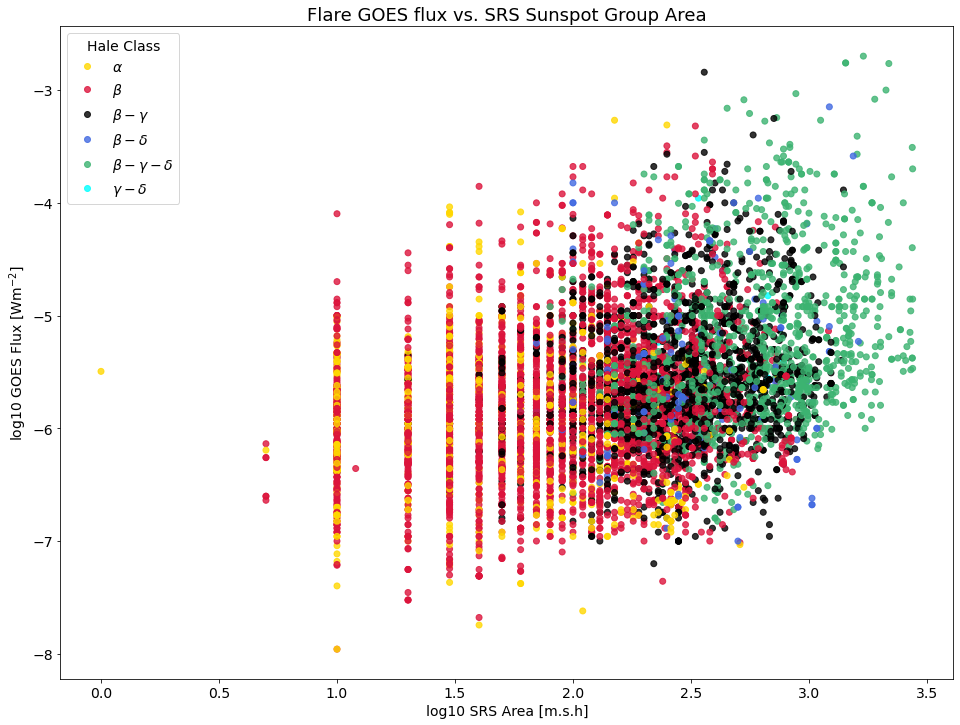

In [21]:
# Setting Hale Class colours
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['gold','crimson','black','royalblue','mediumseagreen','aqua'])
bounds=[1,2,3,4,5,6,7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plotting
fig1 = plt.figure(figsize=[16,12], facecolor='white')
sct1 = plt.scatter(x=dfs_copy['srs_area'], y=dfs_copy['goes_flux'], c=dfs_copy['srs_hale'], alpha=0.8, cmap=cmap, norm=norm)
plt.title('Flare GOES flux vs. SRS Sunspot Group Area', fontsize=18)
plt.xlabel("log10 SRS Area [m.s.h]", fontsize=14)
plt.ylabel("log10 GOES Flux [Wm$^{-2}$]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Legend
handles, labels = sct1.legend_elements()
labels = [r'$\alpha$', r'$\beta$', 
          r'$\beta - \gamma$', 
          r'$\beta - \delta$', 
          r'$\beta - \gamma - \delta$', 
          r'$\gamma - \delta$']
leg = plt.legend(handles, labels, loc="best", title="Hale Class", fontsize=14)
plt.setp(leg.get_title(), fontsize=14)

#plt.savefig('flux_srs_area.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### Fig 7. top two plots - [ CME Speed vs GOES Flux ] and [ CME Speed vs WLSG ] with [ CME width colourbar ]

In [22]:
# Looking at columns we want
dfw = df[['cme_speed', "smart_wlsg", 'cme_width', 'flare_goes_class']]

# Removing the rows containing any NaN values
dfw = dfw.dropna(how='any')

# Reo-rganising the indicies
dfw = dfw.reset_index()

dfw

index  cme_speed   smart_wlsg  cme_width flare_goes_class
0        79      477.0  16166785.00       78.0             C8.6
1       101      469.0      1230.71      130.0             C2.3
2       107      354.0       535.87       58.0             B2.3
3       173      272.0     23481.70       58.0             B1.6
4       174      312.0     25997.32       79.0             B6.6
...     ...        ...          ...        ...              ...
6662  29690       93.0     50067.10      233.0             B2.5
6663  29691      338.0     32469.57       52.0             B6.5
6664  29692      306.0     24809.39       11.0             C1.4
6665  29693      278.0     24809.39       14.0             C1.4
6666  29713      327.0     13511.04        7.0             B1.4

[6667 rows x 5 columns]

In [23]:
''' Repeating splitting the GOES class ---> do this more efficiently later..lol '''

# Splitting goes_class column into 2 so as to separate the class form the flux value
goes_split = dfw.flare_goes_class.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
goes_split.columns = ["goes_class", "goes_flux"]

# Adding these new columns into dfs 
dfw['goes_class'] = goes_split['goes_class']
dfw['goes_flux'] = goes_split['goes_flux']

# Going to replace each value of 7,4 with 7.4
dfw['goes_flux'] = dfw['goes_flux'].replace(['7,4'],'7.4')

# Converting string flux values to a float
dfw['goes_flux'] = dfw['goes_flux'].astype(float)

# Now multiplying the flux values by the relevant power for its GOES class
dfw.loc[dfw.goes_class == 'A', 'goes_flux'] *= 1e-8
dfw.loc[dfw.goes_class == 'B', 'goes_flux'] *= 1e-7
dfw.loc[dfw.goes_class == 'C', 'goes_flux'] *= 1e-6
dfw.loc[dfw.goes_class == 'M', 'goes_flux'] *= 1e-5
dfw.loc[dfw.goes_class == 'X', 'goes_flux'] *= 1e-4

In [24]:
dfw

index  cme_speed   smart_wlsg  cme_width flare_goes_class goes_class  \
0        79      477.0  16166785.00       78.0             C8.6          C   
1       101      469.0      1230.71      130.0             C2.3          C   
2       107      354.0       535.87       58.0             B2.3          B   
3       173      272.0     23481.70       58.0             B1.6          B   
4       174      312.0     25997.32       79.0             B6.6          B   
...     ...        ...          ...        ...              ...        ...   
6662  29690       93.0     50067.10      233.0             B2.5          B   
6663  29691      338.0     32469.57       52.0             B6.5          B   
6664  29692      306.0     24809.39       11.0             C1.4          C   
6665  29693      278.0     24809.39       14.0             C1.4          C   
6666  29713      327.0     13511.04        7.0             B1.4          B   

         goes_flux  
0     8.600000e-06  
1     2.300000e-06  
2     2.300000e-07  
3     1.600000e-07  
4     6.600000e-07  
...            ...  
6662  2.500000e-07  
6663  6.500000e-07  
6664  1.400000e-06  
6665  1.400000e-06  
6666  1.400000e-07  

[6667 rows x 7 columns]

In [25]:
# CAREFUL: I logged the goes_flux, don't run this again!!
dfw['goes_flux'] = np.log10(dfw['goes_flux'])

In [26]:
# Let's get rid of the outlier
print(max(dfw['goes_flux']))

# Finding it's index
max_index = dfw['goes_flux'].idxmax()
print(max_index)

0.9777236052888477
2738


In [27]:
# Now to remove this row
dfw = dfw.drop(dfw.index[2738])

print(max(dfw['goes_flux']))

-2.6989700043360187


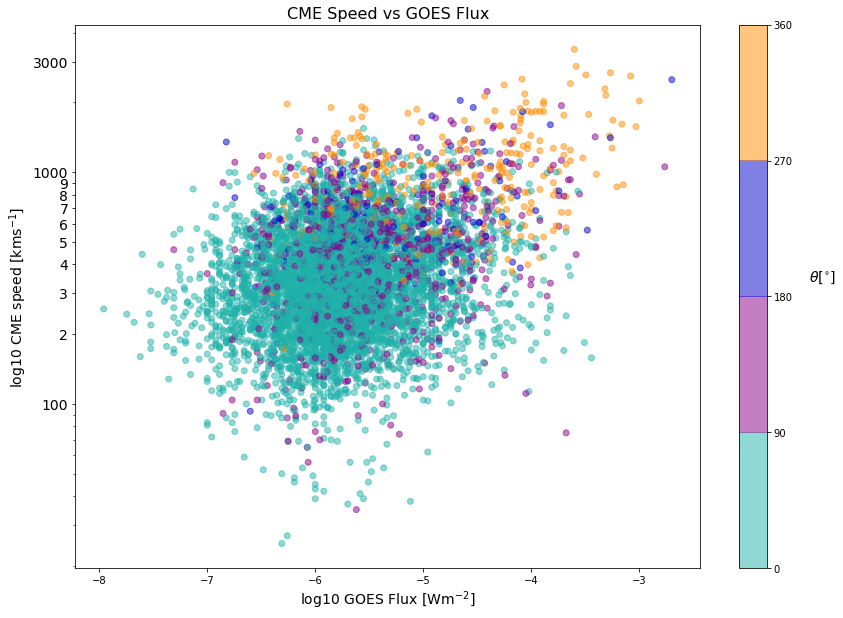

In [28]:
# Creating a custom colormap
cmap2 = mpl.colors.ListedColormap(['lightseagreen','darkmagenta', 'mediumblue', 'darkorange'])
bounds2 = [0,90,180,270,360]
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

# GOES Flux
fig2 = plt.figure(figsize=[14,10], facecolor='white')
gflux = plt.scatter(x=dfw['goes_flux'], y=dfw['cme_speed'], c=dfw['cme_width'], alpha=0.5, 
                                                            cmap=cmap2, norm=norm2)
plt.title('CME Speed vs GOES Flux', fontsize=16)
plt.xlabel("log10 GOES Flux [Wm$^{-2}$]", fontsize=14)
plt.ylabel("log10 CME speed [kms$^{-1}$]", fontsize=14)
#plt.ylim([20,3000])
#plt.xscale("log")
plt.yscale("log", base=10)


cbar = fig2.colorbar(gflux)
cbar.set_label(r'$\theta$[$^{\circ}$]', fontsize=14, rotation=0, labelpad=30, y=0.55)

plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000], 
           labels=[r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)

#plt.savefig('gflux_width.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [29]:
# There are a lot of zero's in the WLSG column ---> let's remove these by dropping those rows
dfw = dfw[(dfw[['smart_wlsg']] != 0).all(axis=1)]

# Created a boolean DataFrame by comparing all filtered column values by a scalar for NOT equality and then checked all the 
# boolean Trues per row by all 

In [30]:
# logging wlsg column
dfw['smart_wlsg'] = np.log10(dfw['smart_wlsg'])

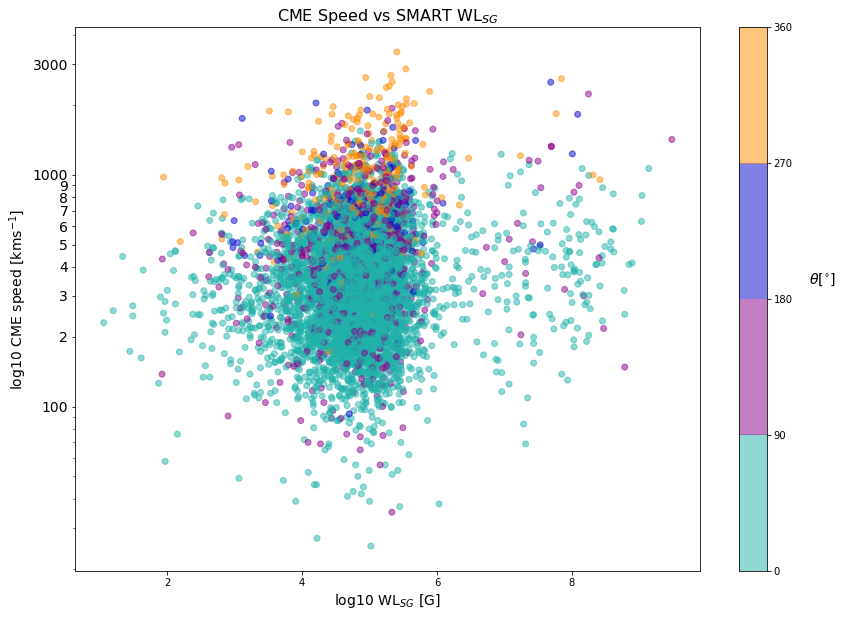

In [31]:
# WLSG
fig3 = plt.figure(figsize=[14,10], facecolor='white')
wlsg = plt.scatter(x=dfw['smart_wlsg'], y=dfw['cme_speed'], c=dfw['cme_width'], alpha=0.5, 
                                                            cmap=cmap2, norm=norm2)
plt.title('CME Speed vs SMART WL$_{SG}$', fontsize=16)
plt.xlabel('log10 WL$_{SG}$ [G]', fontsize=14)
plt.ylabel("log10 CME speed [kms$^{-1}$]", fontsize=14)
#plt.ylim([20,3000])
#plt.xscale("log", base=10)
plt.yscale("log", base=10)


cbar2 = fig3.colorbar(wlsg)
cbar2.set_label(r'$\theta$[$^{\circ}$]', fontsize=14, rotation=0, labelpad=30, y=0.55)

plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000], 
           labels=[r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)

#plt.savefig('wlsg_width.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [32]:
# Going to remove values greater than 7 for the craic (and greater than 2)
test = dfw.copy()
test = dfw[ (dfw['smart_wlsg'] > 2) & (dfw['smart_wlsg'] < 7) ]  

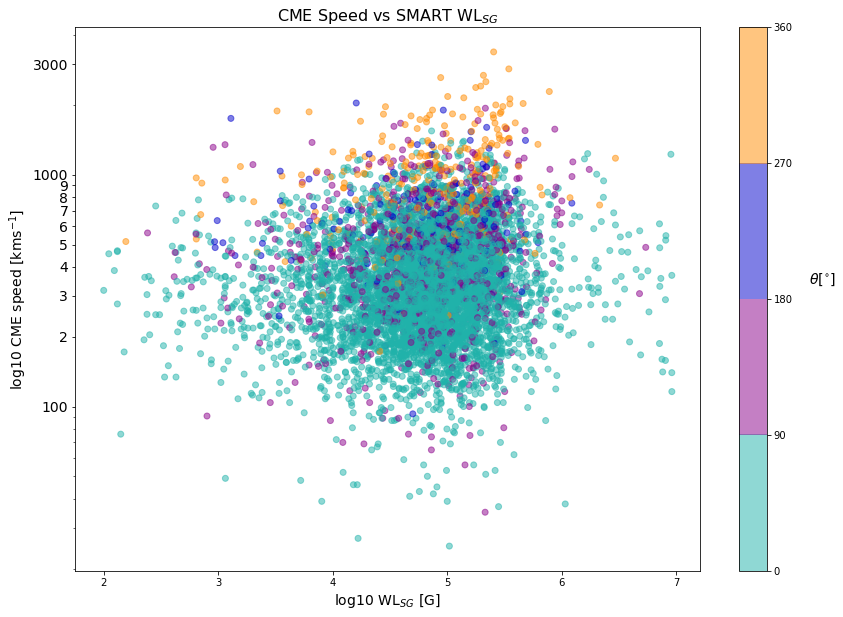

In [33]:
# WLSG --> values > 2 but < 7
fig4 = plt.figure(figsize=[14,10], facecolor='white')
wlsg2 = plt.scatter(x=test['smart_wlsg'], y=test['cme_speed'], c=test['cme_width'], alpha=0.5, 
                                                            cmap=cmap2, norm=norm2)
plt.title('CME Speed vs SMART WL$_{SG}$', fontsize=16)
plt.xlabel('log10 WL$_{SG}$ [G]', fontsize=14)
plt.ylabel("log10 CME speed [kms$^{-1}$]", fontsize=14)
plt.yscale("log", base=10)

cbar = fig4.colorbar(wlsg)
cbar.set_label(r'$\theta$[$^{\circ}$]', fontsize=14, rotation=0, labelpad=30, y=0.55)

plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000], 
           labels=[r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)

#plt.savefig('wlsg_width_2.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

## Histograms

In [34]:
# Doing CME data first
dfcme = df[['cme_width', "cme_angle", 'cme_speed', 'cme_mass', 'cme_kinetic_energy']]

# Removing the rows containing any NaN values
dfcme = dfcme.dropna(how='any')

# Reo-rganising the indicies
dfcme = dfcme.reset_index()

dfcme

index  cme_width  cme_angle  cme_speed cme_mass cme_kinetic_energy
0          0       35.0      274.0      499.0  2.6e+14            3.2e+29
1          1       82.0      210.0      118.0  9.8e+13            6.8e+27
2          4       68.0       68.0      148.0  4.6e+14            5.0e+28
3          5       42.0      290.0      413.0  9.1e+14            7.7e+29
4          7       92.0      259.0      298.0  4.8e+14            2.2e+29
...      ...        ...        ...        ...      ...                ...
19051  30023       58.0       99.0      154.0  7.8e+13            9.2e+27
19052  30026       21.0      302.0      437.0  1.2e+13            1.2e+28
19053  30028       46.0      284.0      449.0  5.8e+13            5.9e+28
19054  30029       39.0      277.0       56.0  4.4e+14            6.9e+27
19055  30030       83.0      256.0      103.0  9.2e+14            4.9e+28

[19056 rows x 6 columns]

In [35]:
# Weird problem with some of the mass and KE values ---> fix by making them floats
dfcme['cme_mass'] = dfcme['cme_mass'].astype(float)
dfcme['cme_kinetic_energy'] = dfcme['cme_kinetic_energy'].astype(float)

In [53]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=dfw['goes_flux'],
    histnorm='percent',
    marker_color='#EB89B5',
    opacity=0.75
))

In [37]:
# Using plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=4)
trace1 = go.Histogram(x=dfcme['cme_width'], 
                      histnorm='percent')
trace2 = go.Histogram(x=dfcme['cme_angle'], 
                      histnorm='percent')
trace3 = go.Histogram(x=dfcme['cme_speed'], 
                      histnorm='percent')
trace4 = go.Histogram(x=dfcme['cme_mass'], 
                      histnorm='percent')
#trace5 = go.Histogram(x=dfcme[''cme_kinetic_energy''])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
#fig.append_trace(trace5, 3, 1)

fig.update_layout(
    width=1700,
    height=700,
    title_text='CME Stats',
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

#dfcme.iplot(kind='histogram', subplots=True, shape=(2, 5), histnorm='percent')

(array([ 927., 2223., 3552., 2047.,  767.,  790., 2157., 3490., 2151.,
         952.]),
 array([  0. ,  35.9,  71.8, 107.7, 143.6, 179.5, 215.4, 251.3, 287.2,
        323.1, 359. ]),
 <BarContainer object of 10 artists>)

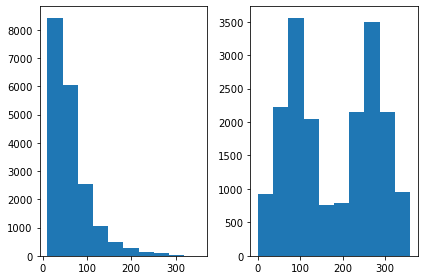

In [38]:
# Matplotlib histograms
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
axs[0].hist(dfcme['cme_width'])
axs[1].hist(dfcme['cme_angle'])



<ipython-input-39-d703201a01d8>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



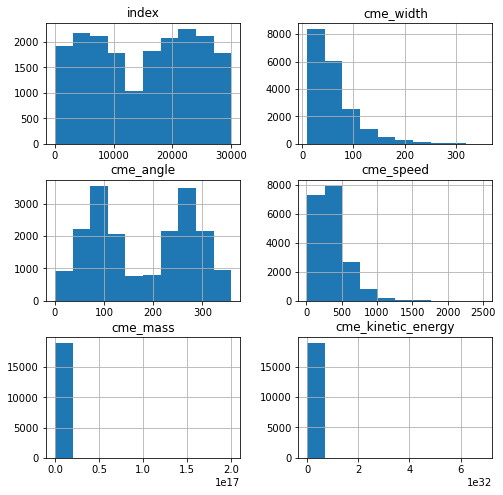

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dfcme.hist(ax=ax)
plt.show()

In [117]:
# Going to remove outlier values from CME speed
test = dfcme.copy()
test = dfcme[dfcme['cme_speed'] < 1500]  
print(max(test['cme_speed']))

1499.0


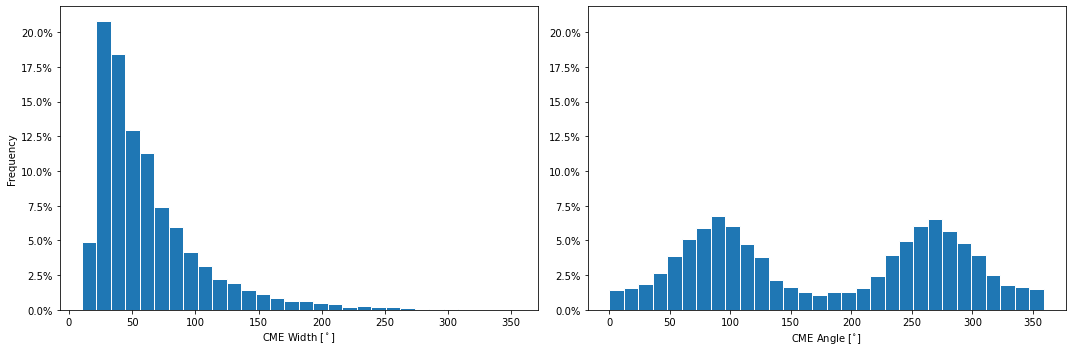

In [199]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5), facecolor='white', sharey=True)

# CME width
ax1.hist(dfcme['cme_width'], edgecolor = 'white', align = 'mid', 
         weights=np.ones(len(dfcme['cme_width'])) / len(dfcme['cme_width']),
         bins=30)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax1.set_xlabel('CME Width [$^\circ$]')
ax1.set_ylabel('Frequency')

# CME angle
ax2.hist(dfcme['cme_angle'], edgecolor = 'white', align = 'mid',
         weights=np.ones(len(dfcme['cme_angle'])) / len(dfcme['cme_angle']), 
         bins=30)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax2.yaxis.set_tick_params(labelleft=True)
ax2.set_xlabel('CME Angle [$^{\circ}$]')

plt.tight_layout()
plt.savefig('cme_hist_perc.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

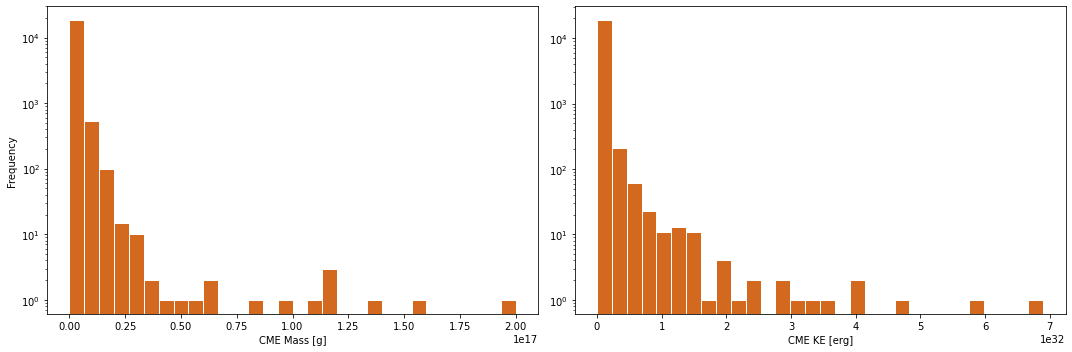

In [201]:
fig, (ax4, ax5) = plt.subplots(1,2, figsize = (15,5), facecolor='white')

ax4.hist(dfcme['cme_mass'], edgecolor = 'white', align = 'mid', bins=30, color = 'chocolate')
ax4.set_yscale('log')
ax4.set_xlabel('CME Mass [g]')
ax4.set_ylabel('Frequency')

ax5.hist(dfcme['cme_kinetic_energy'], edgecolor = 'white', align = 'mid', bins=30, color = 'chocolate')
ax5.set_yscale('log')
ax5.set_xlabel('CME KE [erg]')

plt.tight_layout()
plt.savefig('cme_hist_perc2.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### GOES class and SRS hists

In [66]:
dfsrs = df[['srs_no_spots', "srs_area"]]
# Removing the rows containing any NaN values
dfsrs = dfsrs.dropna(how='any')

# Reo-rganising the indicies
dfsrs = dfsrs.reset_index()

dfsrs['srs_area'] = dfsrs['srs_area'].astype(float)
dfsrs['srs_no_spots'] = dfsrs['srs_no_spots'].astype(float)
dfsrs

index  srs_no_spots  srs_area
0        71          41.0     880.0
1        79          28.0     580.0
2        81          13.0     450.0
3       100           1.0      10.0
4       101           1.0      10.0
...     ...           ...       ...
7380  29695           6.0     240.0
7381  29696           6.0     240.0
7382  29697           3.0     160.0
7383  29698           3.0     160.0
7384  29713           3.0     150.0

[7385 rows x 3 columns]

In [180]:
# Going to remove values greater than -7 and less than -2
flux_test = dfw.copy()
flux_test = dfw[ (dfw['goes_flux'] > -7.0) & (dfw['goes_flux'] < -3.0) ]  

area_test = dfsrs[dfsrs['srs_area'] < 2500.0]
no_test = dfsrs[dfsrs['srs_no_spots'] < 120.0]

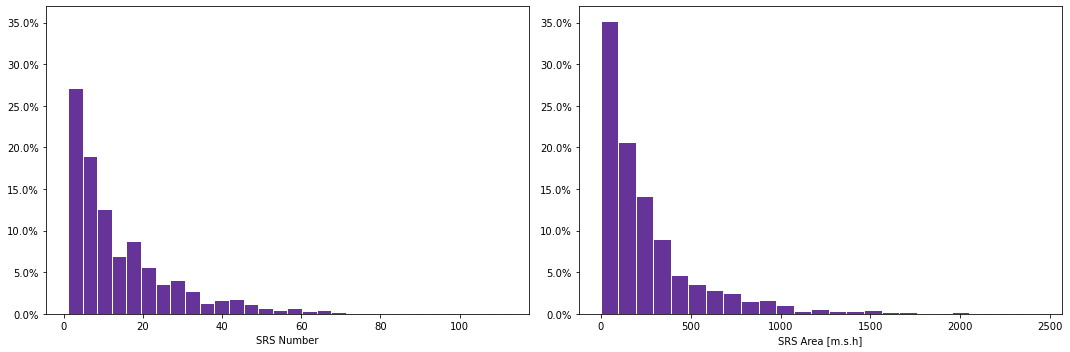

In [202]:
import matplotlib.ticker as ticker

fig, (ax2, ax3) = plt.subplots(1,2, figsize = (15,5), facecolor='white', sharey=True)

# Sunspot Number
ax2.hist(no_test['srs_no_spots'], edgecolor = 'white', align = 'mid', color = 'rebeccapurple',
         weights=np.ones(len(no_test['srs_no_spots'])) / len(no_test['srs_no_spots']),
         bins=30)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax2.set_xlabel('SRS Number')
ax2.yaxis.set_tick_params(labelleft=True)

# Sunspot area
ax3.hist(area_test['srs_area'], edgecolor = 'white', align = 'mid', color = 'rebeccapurple',
         weights=np.ones(len(area_test['srs_area'])) / len(area_test['srs_area']),
         bins=25)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax3.set_xlabel('SRS Area [m.s.h]')
ax3.yaxis.set_tick_params(labelleft=True)

plt.tight_layout()
plt.savefig('srs_hist_perc.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### SMART Props

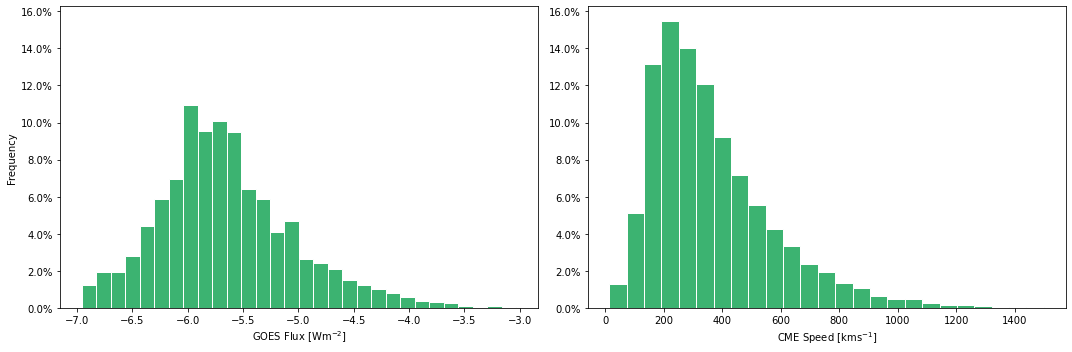

In [203]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5), facecolor='white', sharey=True)

# GOES flux
ax1.hist(flux_test['goes_flux'], edgecolor = 'white', align = 'mid', color = 'mediumseagreen',
         weights=np.ones(len(flux_test['goes_flux'])) / len(flux_test['goes_flux']),
         bins=30)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax1.set_xlabel('GOES Flux [Wm$^{-2}$]')
ax1.set_ylabel('Frequency')

# CME speed
ax2.hist(test['cme_speed'], edgecolor = 'white', align = 'mid', color = 'mediumseagreen',
         weights=np.ones(len(test['cme_speed'])) / len(test['cme_speed']),
         bins=25)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax2.yaxis.set_tick_params(labelleft=True)
ax2.set_xlabel('CME Speed [kms$^{-1}$]')

plt.tight_layout()
plt.savefig('flux_speed_hist.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()